
[CASE 1] Features: ['STL', 'BLK', 'AST_TO', 'PLUS_MINUS']
Model R² Score: 0.9754069441256492

Top NBA Players by Predicted Win Impact:
                  PLAYER_NAME  Predicted_Win_Impact
78              Chet Holmgren              0.950079
501   Shai Gilgeous-Alexander              0.947058
434              Nikola Jokić              0.943412
141             Derrick White              0.900112
483               Rudy Gobert              0.885427
58                Brook Lopez              0.843024
333  Kentavious Caldwell-Pope              0.809058
268              Jayson Tatum              0.806271
28              Anthony Davis              0.797016
354        Kristaps Porziņģis              0.777361
202        Isaiah Hartenstein              0.773458
320              Jusuf Nurkić              0.754890
555         Victor Wembanyama              0.753429
462               Paul George              0.745048
324             Kawhi Leonard              0.741922
29            Anthony Edwards   

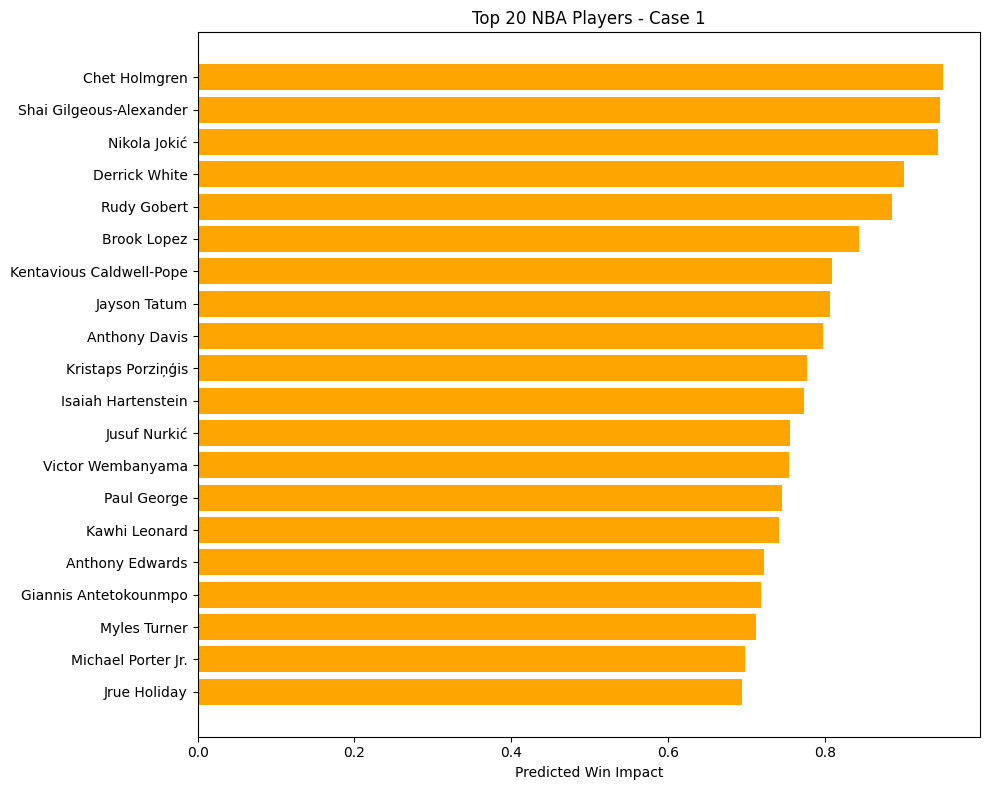

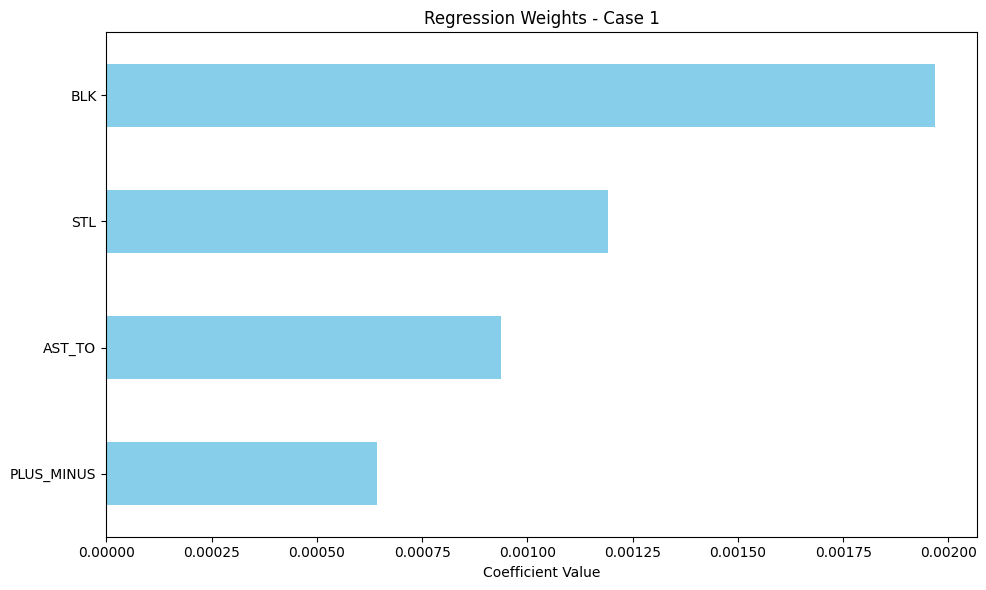


[CASE 2] Features: ['AST_TO', 'PFD', 'BLKA', 'FG3_PCT']
Model R² Score: 0.22527680067345723

Top NBA Players by Predicted Win Impact:
                 PLAYER_NAME  Predicted_Win_Impact
184    Giannis Antetokounmpo              0.794713
501  Shai Gilgeous-Alexander              0.716857
233            Jalen Brunson              0.705459
129            DeMar DeRozan              0.692940
372              Luka Dončić              0.690468
256        Jaren Jackson Jr.              0.683066
434             Nikola Jokić              0.678758
571          Zion Williamson              0.678464
28             Anthony Davis              0.672591
149         Domantas Sabonis              0.660781
454           Paolo Banchero              0.660746
109           Damian Lillard              0.650576
138           Dereon Seabron              0.639510
483              Rudy Gobert              0.638750
96             Collin Sexton              0.635325
258            Jarrett Allen              0.62386

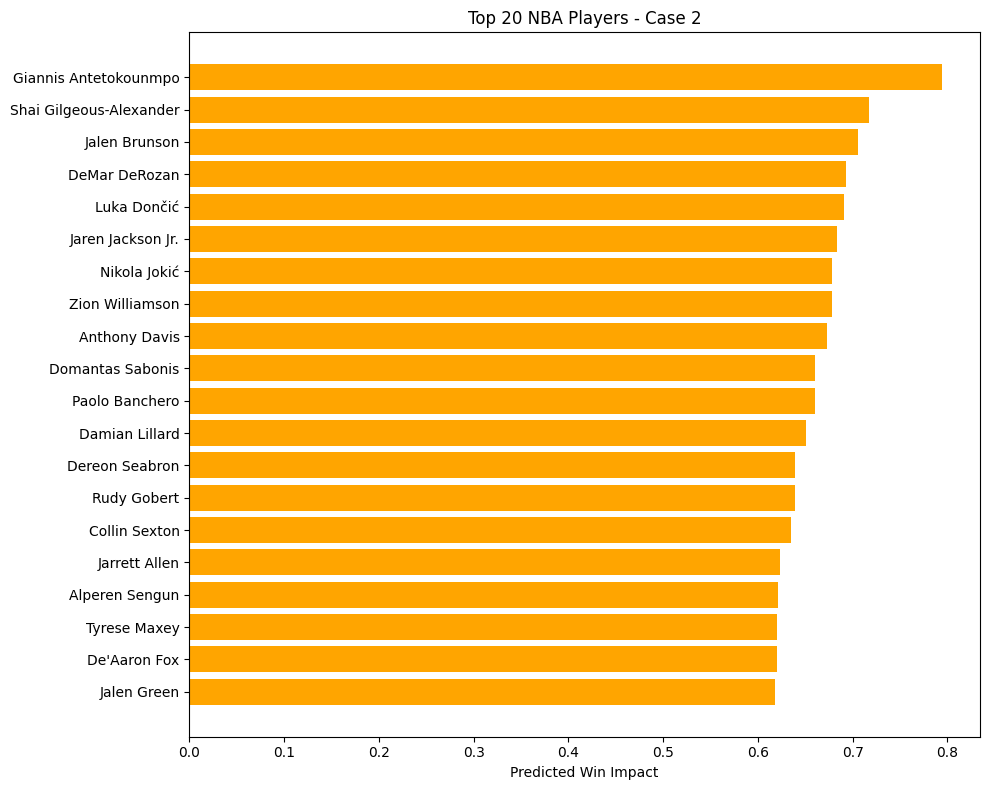

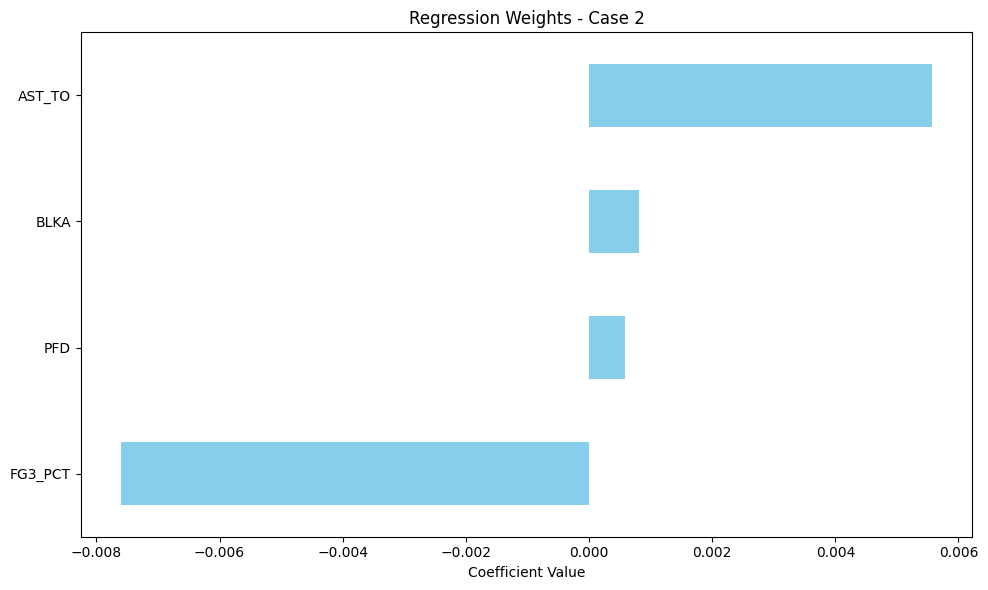


[CASE 3] Features: ['W_PCT', 'PLUS_MINUS', 'AST_TO', 'FG3_PCT']
Model R² Score: 0.9602820173421753

Top NBA Players by Predicted Win Impact:
                  PLAYER_NAME  Predicted_Win_Impact
434              Nikola Jokić              1.000000
141             Derrick White              0.970253
501   Shai Gilgeous-Alexander              0.964721
268              Jayson Tatum              0.960382
333  Kentavious Caldwell-Pope              0.933012
233             Jalen Brunson              0.887205
490                Sam Hauser              0.873183
406        Michael Porter Jr.              0.856168
462               Paul George              0.847677
464          Payton Pritchard              0.842501
29            Anthony Edwards              0.826051
309              Jrue Holiday              0.823899
10                 Al Horford              0.820275
3                Aaron Gordon              0.819908
78              Chet Holmgren              0.819179
354        Kristaps Porziņ

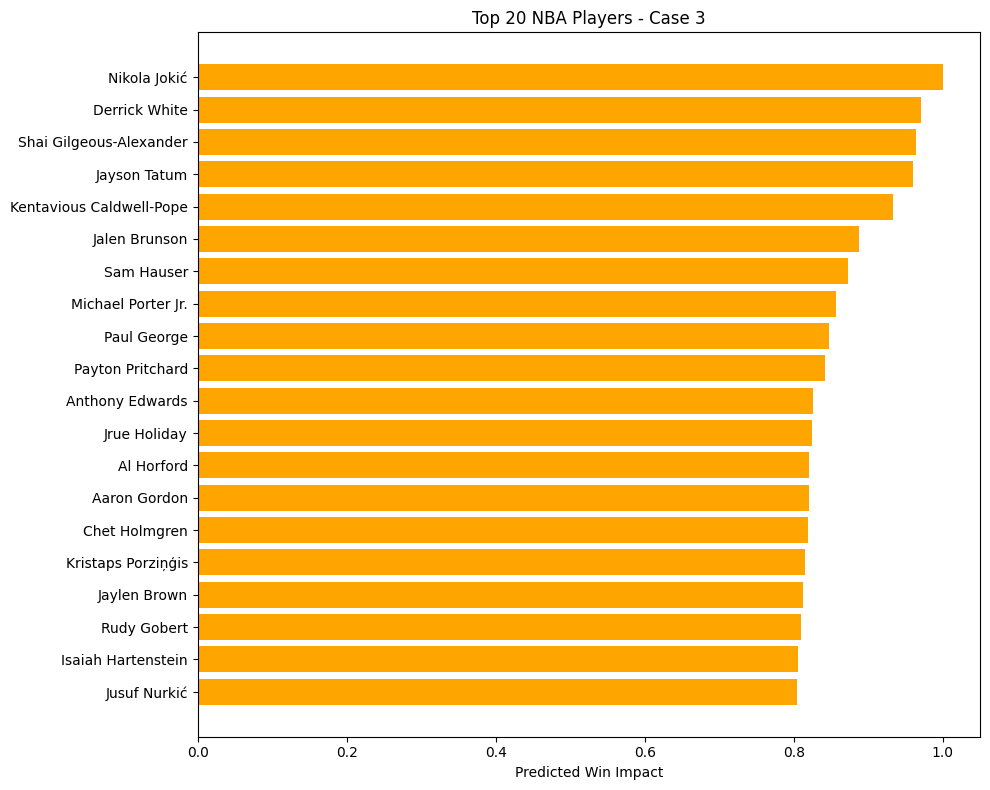

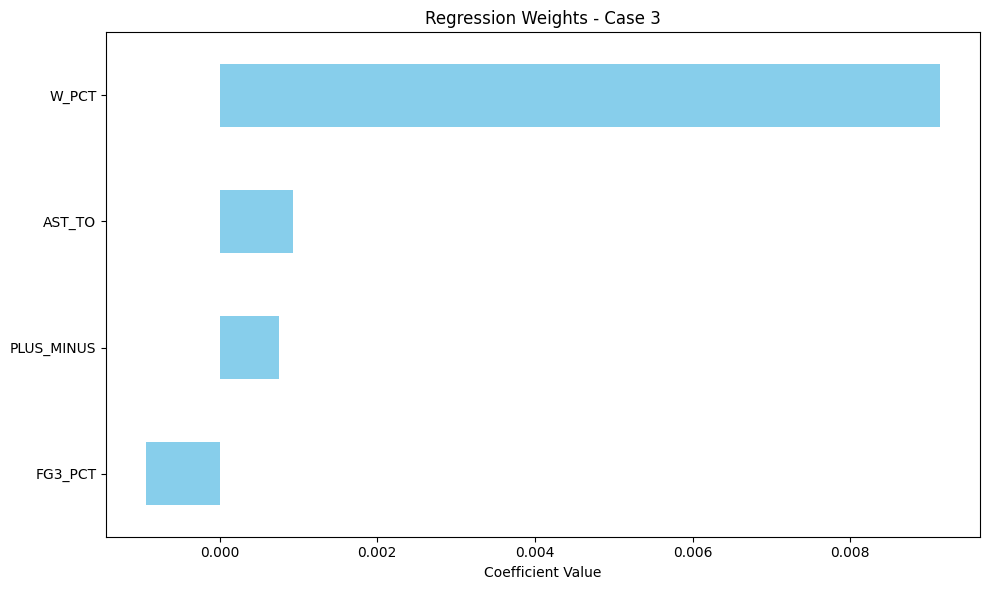


[CASE 4] Features: ['BLK', 'STL', 'PFD', 'BLKA']
Model R² Score: 0.9334955790641407

Top NBA Players by Predicted Win Impact:
                 PLAYER_NAME  Predicted_Win_Impact
555        Victor Wembanyama              1.000000
28             Anthony Davis              0.830114
78             Chet Holmgren              0.768124
58               Brook Lopez              0.720077
483              Rudy Gobert              0.708019
110           Daniel Gafford              0.669792
501  Shai Gilgeous-Alexander              0.643423
429              Nic Claxton              0.628935
256        Jaren Jackson Jr.              0.617248
421             Myles Turner              0.614417
558           Walker Kessler              0.597961
184    Giannis Antetokounmpo              0.582317
434             Nikola Jokić              0.560504
337             Kevin Durant              0.539510
13               Alex Caruso              0.537942
354       Kristaps Porziņģis              0.527386
124   

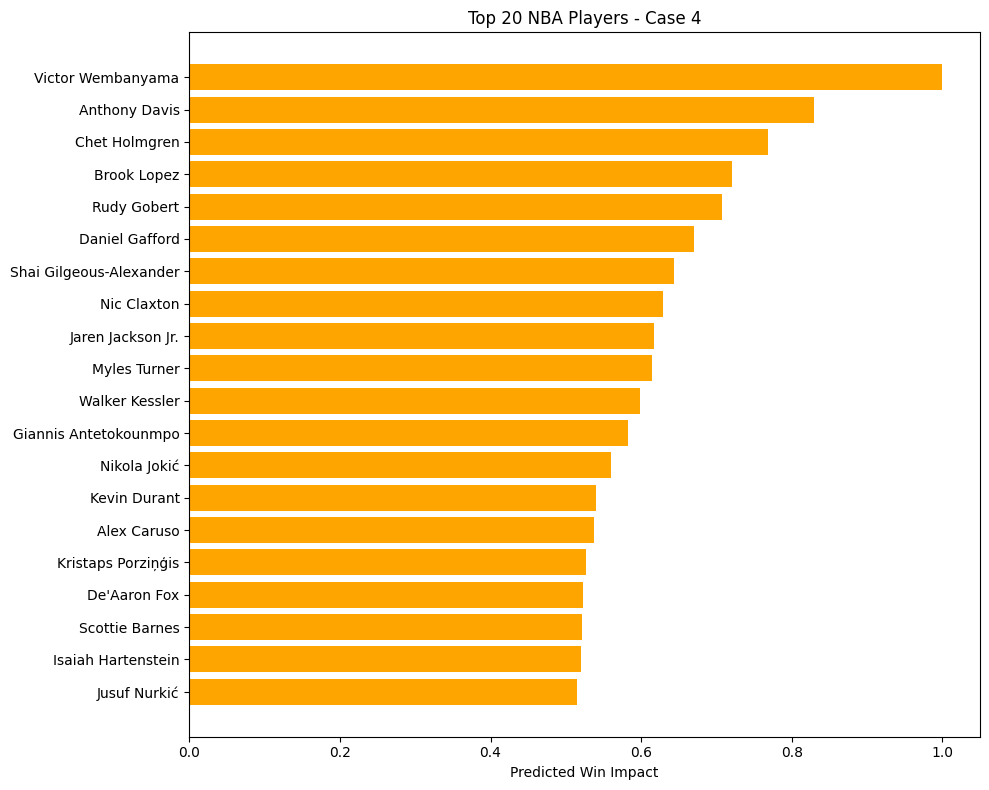

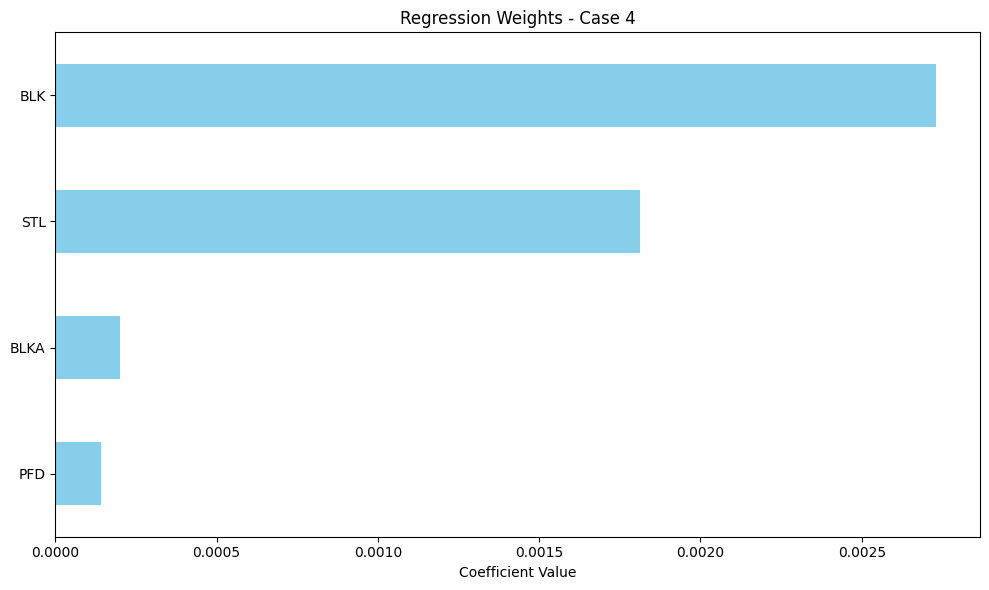


[CASE 5] Features: ['STL', 'BLK', 'FG3_PCT', 'PFD', 'BLKA', 'PLUS_MINUS', 'W_PCT', 'AST_TO']
Model R² Score: 0.9767990121104645

Top NBA Players by Predicted Win Impact:
                  PLAYER_NAME  Predicted_Win_Impact
501   Shai Gilgeous-Alexander              0.997103
434              Nikola Jokić              0.984463
78              Chet Holmgren              0.965246
483               Rudy Gobert              0.911404
141             Derrick White              0.897207
268              Jayson Tatum              0.838132
28              Anthony Davis              0.835331
58                Brook Lopez              0.827538
333  Kentavious Caldwell-Pope              0.798025
184     Giannis Antetokounmpo              0.785678
354        Kristaps Porziņģis              0.779470
320              Jusuf Nurkić              0.773864
202        Isaiah Hartenstein              0.770134
462               Paul George              0.765481
555         Victor Wembanyama              0.7601

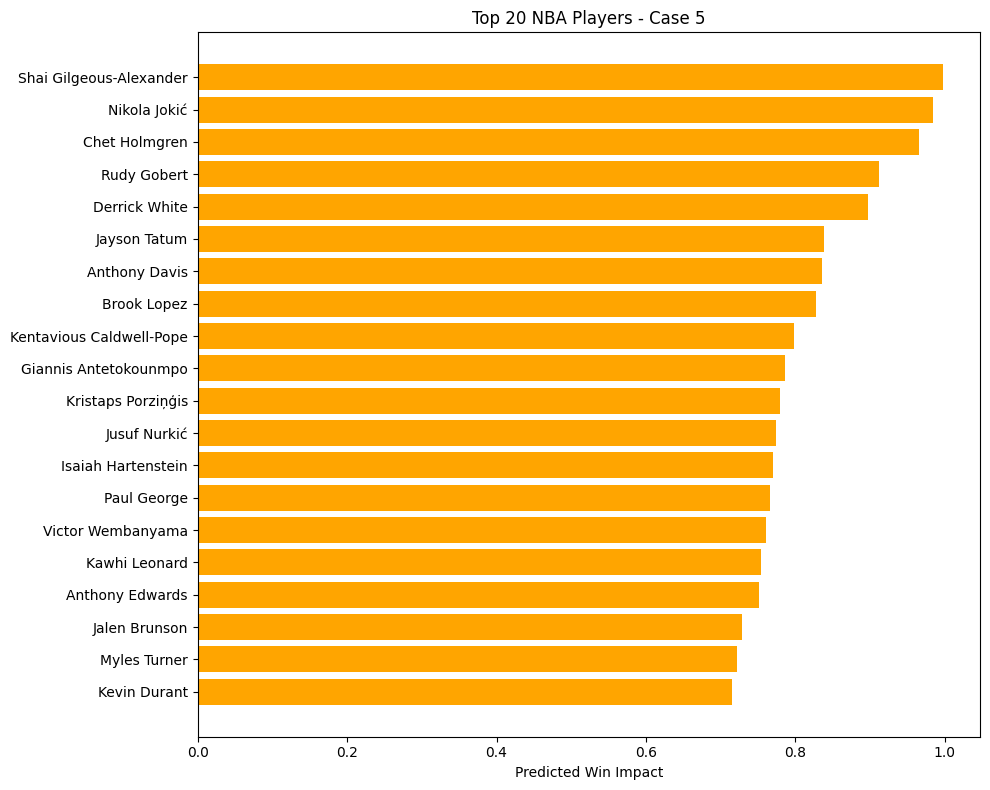

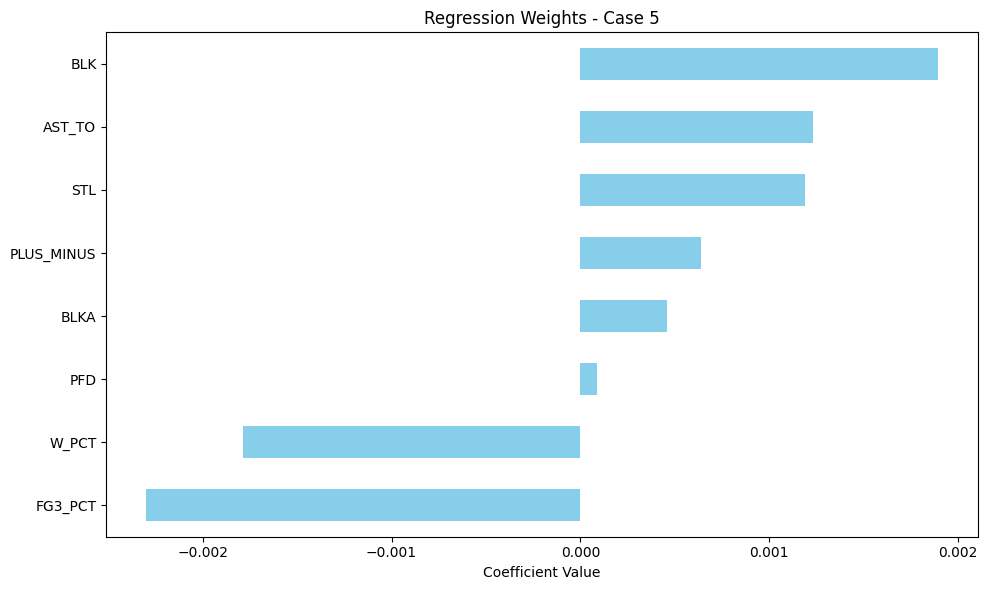

In [3]:
!pip install nba_api
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set seed for reproducibility
np.random.seed(42)

# Fetch NBA player data for the 2023–24 season
df = leaguedashplayerstats.LeagueDashPlayerStats(season="2023-24").get_data_frames()[0]
df = df.drop_duplicates(subset='PLAYER_NAME')

# Keep relevant columns
df = df[['PLAYER_NAME', 'STL', 'BLK', 'FG3_PCT', 'PFD', 'BLKA', 'PLUS_MINUS', 'W_PCT', 'TOV', 'AST']]
df['AST_TO'] = df['AST'] / df['TOV'].replace(0, 0.1)  # Avoid division by zero

# Define cases
case_features = {
    1: ['STL', 'BLK', 'AST_TO', 'PLUS_MINUS'],
    2: ['AST_TO', 'PFD', 'BLKA', 'FG3_PCT'],
    3: ['W_PCT', 'PLUS_MINUS', 'AST_TO', 'FG3_PCT'],
    4: ['BLK', 'STL', 'PFD', 'BLKA'],
    5: ['STL', 'BLK', 'FG3_PCT', 'PFD', 'BLKA', 'PLUS_MINUS', 'W_PCT', 'AST_TO']
}

# True coefficients for generating synthetic WIN_IMPACT
true_coeffs = {
    'STL': 0.01 / 1000,
    'BLK': 0.015 / 1000,
    'FG3_PCT': 0.005 / 1000,
    'PFD': 0.001 / 1000,
    'BLKA': 0.001 / 1000,
    'PLUS_MINUS': 0.005 / 1000,
    'W_PCT': 0.003 / 1000,
    'AST_TO': 0.007 / 1000
}

# Loop over all cases
for case_number, features in case_features.items():
    df_case = df.copy()
    noise = np.random.normal(loc=0, scale=0.0002, size=len(df_case))
    win_impact = sum(true_coeffs[f] * df_case[f] for f in features if f in true_coeffs) + noise
    df_case['WIN_IMPACT'] = (win_impact - win_impact.min()) / (win_impact.max() - win_impact.min())

    X = df_case[features]
    Y = df_case['WIN_IMPACT']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    df_case['Predicted_Win_Impact'] = model.predict(X).clip(0, 1)
    df_sorted = df_case.sort_values(by='Predicted_Win_Impact', ascending=False)

    # Print summary
    print(f"\n[CASE {case_number}] Features: {features}")
    print("Model R² Score:", r2_score(Y_test, Y_pred))
    print("\nTop NBA Players by Predicted Win Impact:")
    print(df_sorted[['PLAYER_NAME', 'Predicted_Win_Impact']].head(20))

    # Plot Top 20 players
    plt.figure(figsize=(10, 8))
    plt.barh(df_sorted['PLAYER_NAME'].head(20), df_sorted['Predicted_Win_Impact'].head(20), color='orange')
    plt.xlabel("Predicted Win Impact")
    plt.title(f"Top 20 NBA Players - Case {case_number}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Plot regression coefficients
    coefficients = pd.Series(model.coef_, index=features)
    plt.figure(figsize=(10, 6))
    coefficients.sort_values().plot(kind='barh', color='skyblue')
    plt.title(f'Regression Weights - Case {case_number}')
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()
